# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices
## Student Name: Sugam Khetrapal

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
# sklearn.cross_validation was resulting in a deprecation warning, hence I had switched to sklearn.model_selection
# from sklearn.model_selection import ShuffleSplit
from sklearn.cross_validation import ShuffleSplit
import sklearn

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))
print('The scikit-learn version is {}.'.format(sklearn.__version__))


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.
The scikit-learn version is 0.19.1.


/opt/conda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# In order to improve the readability of the numbers, I have referenced the following code to format the numbers; $100000 will be formatted as $100.00K and $1000000 will be formatted as $1.00M 
# Following code has been referenced from https://stackoverflow.com/questions/579310/formatting-long-numbers-as-strings-in-python
def human_format(num, precision=2, suffixes=['', 'K', 'M', 'G', 'T', 'P']):
    m = sum([abs(num/1000.0**x) >= 1 for x in range(1, len(suffixes))])
    return f'{num/1000.0**m:.{precision}f}{suffixes[m]}'

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(human_format(minimum_price)))
print("Maximum price: ${}".format(human_format(maximum_price)))
print("Mean price: ${}".format(human_format(mean_price)))
print("Median price ${}".format(human_format(median_price)))
print("Standard deviation of prices: ${}".format(human_format(std_price)))


Statistics for Boston housing dataset:

Minimum price: $105.00K
Maximum price: $1.02M
Mean price: $454.34K
Median price $438.90K
Standard deviation of prices: $165.17K


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

Please find below the answers to the questions stated above:
> 1. A home that has an 'RM' value of 7 will be worth more compared to a home with an 'RM' value of 6. More rooms implies an increase in the price of house. More rooms would result in higher price. Less rooms would result in less price. Hence, an increase in the value of 'RM' value would lead to an increase in the value of 'MEDV'. Now the question is, how much of an increase in the 'RM' value would lead to how much of an increase in the value of 'MEDV'.

> 2. A neighborhood that has an 'LSTAT' value of 15 would be worth more compared to a neighborhood with an 'LSTAT' value of 20. A decrease in the number of lower class workers would mean an increase in the price of the house. Higher value of 'LSTAT' would result in lower price of the house. Lower value of 'LSTAT' would result in higher price of house. Hence, an increase in the value of 'LSTAT' would lead to a decrease in the value of 'MEDV'. Now the question is, how much of an increase in the value of 'LSTAT' would lead to how much of a decrease in the value of 'MEDV'.

>3. A neighborhood which has 'PTRATIO' of 10 would be more expensive compared to a neighborhood with a 'PTRATIO' of 15. A neighborhood which has less number of students per teacher would always be more expensive compared to one with more number of students per teacher. More students per teacher would imply less personal attention which the teacher can give to each student, hence the quality of teaching goes down resulting in a decrease the 'value' of overall neighborhood. Hence, an increase in the value of 'PTRATIO' would lead to an decrease in the value of 'MEDV'. Now the question is, how much of an increase in the value of 'PTRATIO' would lead to how much of a decrease in the value of 'MEDV'.

Let us check whether what we have stated above is backed up by the data or not.

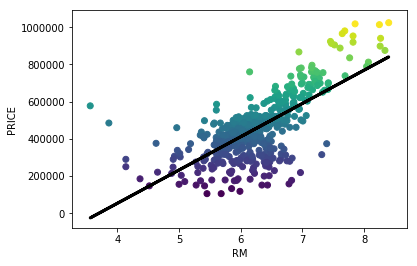

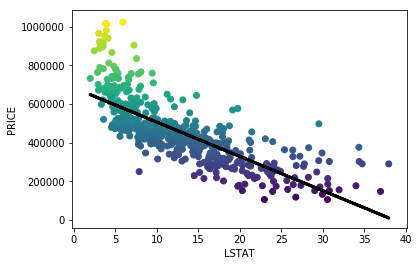

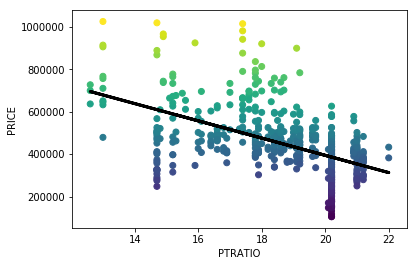

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def our_conclusion(data, independent_var_name):
    reg = LinearRegression()
    covariates = data[independent_var_name].values.reshape(-1, 1)    
    reg.fit(covariates, prices)
    plt.plot(covariates, reg.predict(covariates), color='black', linewidth=3)
    plt.scatter(covariates, prices, alpha=1, c=prices)
    plt.xlabel(independent_var_name)
    plt.ylabel('PRICE')
    plt.show()

# show relationship with each independent variable
our_conclusion(data, 'RM')
our_conclusion(data, 'LSTAT')
our_conclusion(data, 'PTRATIO')

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [4]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

The above R^2 of 0.923 implies that 92.3% of the variation is explained by the target variable. Considering the fact that R^2 varies from 0 to 1, a value of 0.923 should be considered good enough. But we have considered only 5 data points in the statements mentioned above. We should have taken more data points to draw a statistically significant conclusion.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=5)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

If we do not split a dataset into subsets of training and testing then we will not be able to understand how our model actually performs on unseen data. To be able to understand and take corrective action w.r.t to the accuracy of our model we need to ensure that we device a way to test the performance of our model before it is run on unseen data. This is why we split the data into subsets of training and testing so that we can use the training data to train our model and the testing data to check whether we have trained our model accurately or not and take corrective measures as appropriate.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

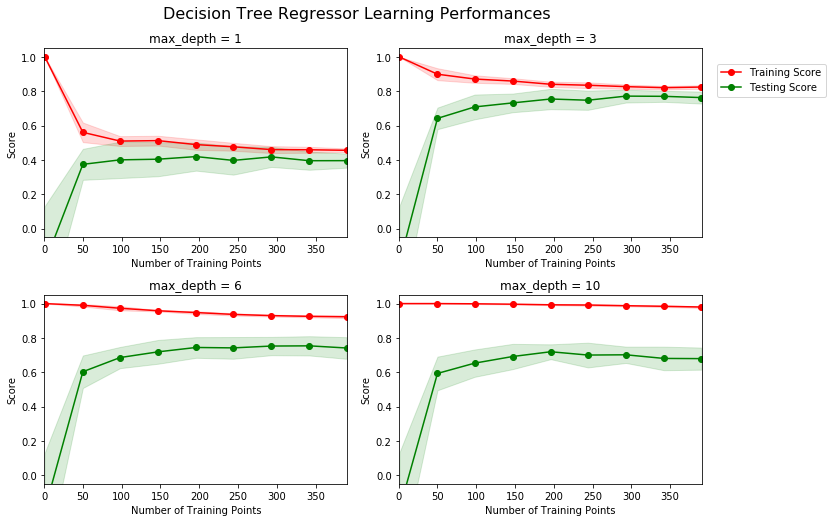

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

Graph1 (max_depth=1) <br>
Training Score: 0.5 <br>
Testing Score: 0.5 <br>
Converging? Yes <br>
As more data points are added, the Training and Testing Curves converge, which is a good thing. <br> 
Having more training data points would not have benefited because the Training and Testing Curves have already converged with the existing data points. <br>
Better than Graph2? No, because the Training/Testing Score of Graph2 is better than Graph1.<br>


Graph2 (max_depth=3) <br>
Training Score: 0.8 <br>
Testing Score: 0.8 <br>
Converging? Yes <br>
As more data points are added, the Training and Testing Curves converge, which is a good thing. <br>
Having more training data points would not have benefited because the Training and Testing Curves have already converged with the existing data points. <br>
Best option available <br>
    
Graph3 (max_depth=6) <br>
Training Score: 0.9 <br>
Testing Score: 0.7 <br>
Converging? No <br>
As more data points are added, the Training and Testing Curves do not converge. With the addition of data points, the Training Curve reaches 0.9 whereas the Testing Curve reaches 0.7, which is not good. <br>
In this case, with the existing data points, the Training and Testing Curves appear to be closest around 300-350 data points. As the data points go beyond 350, the Testing Curve appears to have started moving away from the Training Curve. Hence, having more data points would not have benefited in this case.<br>
    
Graph4 (max_depth=10) <br>
Training Score: 0.95 <br>
Testing Score: 0.60 <br>
Converging? No <br>
As more data points are added, the Training and Testing Curves do not converge. With the addition of data points, the Training Curve reaches 0.95 whereas the Testing Curve reaches 0.6, which is not good. <br>
Having more training data points would not have benefited because the Training and Testing Curves are not even appearing to converge. In fact, the Training Curve appears to move in a straight line whereas the Testing Curve appears to maintain a considerable distance from the Training Curve. <br>

In case the Training and Testing Curves are appearing to move towards each other with the increase in data points, addition of more data points would have made sense. But there may be challenges (cost, time, resources, etc.) in the making more data points available.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

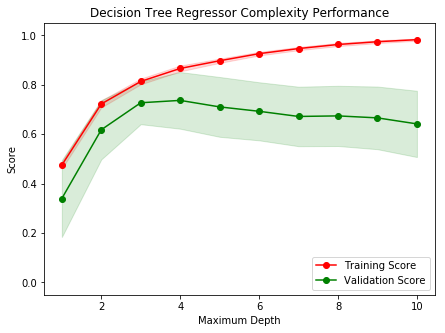

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

When the model is trained with a maximum depth of 1, the model suffers from High Bias.<br>

High Bias can be concluded from the scenario in which there is little or no gap between the Training and Validation scores.<br>
As we can see in Graph1, there is very little or no gap between the Training and Validation scores.<br>
Hence Graph1 can be classified as having "High Bias".<br>
The model needs improvement w.r.t fitting and generalizing the data points.<br>

When the model is trained with a maximum depth of 10, the model suffers from High Variance.<br>

High Variance can be concluded from the scenario in which there is considerable gap between the Training and Testing scores.<br>
As we can see in Graph4, there is considerable gap between the Training and Validation scores.<br>
Hence Graph4 can be classified as having "High Variance".<br>
Although the model performs well w.r.t fitting the data points, it needs improvements w.r.t generalizing the data points.<br>


### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

A Maximum depth of 4 results in a model which generalizes best to unseen data.<br>

After the point where the Training score is approx. 0.88 and max depth = 4, the Training and Validation Curves begin to gradually move away from each other.<br>
This is this point where High Variance starts setting in.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

The Grid Search allows us to create a grid of parameters that we will search using the K-fold Cross Validation technique.<br>
Grid Search technique runs all combinations of the mentioned hyper-parameter values in the quest to find the best model.<br>
After we have the hyper-parameter values to find the best model, we can proceed to find the highest cross validation accuracy which matches with the corresponding hyper-parameters which optimize our model.<br>

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

One of the pre-requisites of the K-Fold Cross Validation technique is that the dataset should have uniform distribution.<br>

The K-Fold Cross-Validation technique splits the dataset in 'K' subsets of equal size.<br>
Each subset plays the role of Testing dataset once and plays the role of Training dataset K-1 times.<br>
The average of testing performance is used as the estimate of of out of sample performance.<br>

Compared to the Grid Search technique, the K-Fold Cross Validation technique results in a more reliable estimate of out of sample performance. <br>
It also reduces the variance of a single trial of splitting the data in Training and Testing subsets.<br>

The K-Folds Cross Validation technique enables us to use the average testing accuracy as the point of reference which helps us in concluding the most suitable set of parameters for our model.

If we use the Grid Search technique instead of K-Fold Cross Validation, we would get different sets of suitable parameters because without a cross-validation set, the estimate of out of sample performance would result in high variance.<br>

In the absense of K-Fold Cross Validation, there is a high probability that the Grid Search technique will result in hyper parameter value combinations that perform very well on a particular Training and Testing dataset only but not as accurately on unseen data, thereby defeating the whole purpose.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [9]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
#from sklearn.grid_search import GridSearchCV
#from sklearn.model_selection import StratifiedKFold
#from sklearn.cross_validation import ShuffleSplit
#from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    
    # I checked, we are using 0.19.1
    # I have upgraded my version of sklearn from 0.19.1 to 0.19.2 because 0.19.1 was giving error w.r.t ShuffleSplit
    
    # cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0, n_splits = 10)
    # cv_sets = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    # cv_sets = StratifiedKFold(y)
    # cv_sets = ShuffleSplit(X.shape[0], n_splits = 10, test_size=0.1, train_size=None, random_state=None)
    # cv_sets = StratifiedKFold(y)
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    # params = {'max_depth': list(range(1,11))}
    params = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    # grid = grid.split(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

The maximum depth of the optimal model is 4.<br>
My answer in Question 6 was that a Maximum depth of 4 results in a model which generalizes best to unseen data.<br>
Hence, my answer is same as the maximum depth of the optimal model.<br>

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${}".format(i+1, human_format(price)))

Predicted selling price for Client 1's home: $411.93K
Predicted selling price for Client 2's home: $235.62K
Predicted selling price for Client 3's home: $922.74K


**Answer: **

I would recommend the following prices to each of my clients:<br>
    -Client1 should quote the Selling Price as $412.00K 

-Client2 should quote the Selling Price as $236.00K

-Client3 should quote the Selling Price as $923.00K

My Data Exploration Findings are as follows:<br>
    -Minimum price: $105.00K

-Maximum price: $1.02M

-Mean price: $454.34K

-Median price $438.90K

-Standard deviation of prices: $165.17K

Given the values for the respective features, these prices seem reasonable to me because they are aligned with my understanding that <br> 
    -an increase in the number of rooms (RM) results in an increase in the price of the house (MEDV), <br>
    -an increase in the number of lower class homeowners (LSTAT) results in a decrease in the price of the house (MEDV) <br>
    -an increase in the number of teacher to students ratio (PTRATIO) results in a decrease in the price of the house (MEDV) <br>

Let us take a look at the numbers of Client2 who has: <br>
    -the minimum number of rooms (4) among the 3 clients <br>
    -highest neighborhood poverty level (32%) among the 3 clients <br>
    -highest student-teacher ratio (22:1) of nearby schools among the 3 clients <br>
    -hence, our results should corroborate our conclusion from the above points that among the 3 clients, Client2 will get the lowest price for his house. <br>
    
Let us take a look at the numbers of Client3 who has:<br>
    -the maximum number of rooms (8) among the 3 clients<br>
    -lowest neighborhood poverty level (3%) among the 3 clients<br>
    -lowest student-teacher ratio (12:1) of nearby schools among the 3 clients<br>
    -hence, our results should corroborate our conclusion from the above points that among the 3 clients, Client3 will get the highest price for his house.<br>
    
Let us take a look at the numbers of Client1 who has:<br>
    -one additional room compared to the 4 room house of Client2<br>
    -almost half neighborhood poverty ratio (17%) compared to that of Client2 who has 32%.<br>
    -the student-teacher ratio of Client1 is 2/3 (15:1) compared to that of Client2 who has (22:1)
    -Conclusion: The price of house of Client1 will be better than that of Client2 but not as high as that of Client3



### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [14]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $390,250.00
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $30,372.22


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

Whether or not the constructed model should be used in a real-world setting depends on the context in which the data was gathered in the first place. It looks like when this dataset was prepared only 3 factors were considered most important while determining the house of the prices.

These days the following factors also play a huge rule in determining the price of the houses:<br>
-supply and demand (most important factor)<br>
-home loan interest rates<br>
-economic growth of the country<br>
-growth of the real estate market<br>
-location of the property<br>
-distance of the property from the nearest market<br>
-distance of the property from the nearest metro station / railway station / airport<br>
-ease of availability of trasport near the property<br>
-number of bathrooms/washrooms<br>
-availability of parking<br>
-whether the property is fully furnished or lots of work needs to be done to make it liveable<br>
-safety/security of the locality<br>
-mode of payment (black / white), in countries where the tax coverage has a long way to go, paying for property in black money reduces the price of the property and paying in full white increases the price of the property as the seller will have to pay tax to the government.<br>
-scope for building additional rooms<br>
-amenities<br>
-disposable income of the buyer, age, education, earning capacity of the buyer.<br>
http://www.homeguru.com.au/house-prices <br>
https://economictimes.indiatimes.com/slideshows/real-estate/factors-affecting-valuation-of-property-in-india/affordability/slideshow/18230242.cms

Since the dataset in this question contains information from the year 1978, the features identified (RM, LSTAT, PTRATIO) would no longer be the only relevant factors today, 40 years later because the amount of land for property remains the same but the population keeps on growing at an ever-increasing pace.<br>

If we take inflation into account, a house worth $400.00K ($400,000) in Boston in 1978 would cost approx. $1.65M ($1,655,100) today(2018) accounting for a price increase of 313.77%. Boston experienced an average inflation rate of 3.61% per year
http://www.in2013dollars.com/Boston-Massachusetts/price-inflation/1978-to-2018?amount=400000


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.